In [1]:
#!unzip ./drive/MyDrive/single-person-pose-estimation/dataset/tfrecords.zip

Archive:  ./drive/MyDrive/single-person-pose-estimation/dataset/tfrecords.zip
   creating: dataset/tfrecords/
   creating: dataset/tfrecords/valid/
  inflating: dataset/tfrecords/valid/file_valid_01-2048.tfrec  
  inflating: dataset/tfrecords/valid/file_valid_03-208.tfrec  
  inflating: dataset/tfrecords/valid/file_valid_02-2048.tfrec  
  inflating: dataset/tfrecords/valid/file_valid_00-2048.tfrec  
   creating: dataset/tfrecords/train/
  inflating: dataset/tfrecords/train/file_train_00-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_26-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_12-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_47-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_05-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_35-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_13-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train_69-2048.tfrec  
  inflating: dataset/tfrecords/train/file_train

In [ ]:
### For reading
def parse_tfrecord_fn(example):
    feature_description = {
        "ann_id": tf.io.FixedLenFeature([], tf.int64),
        "image_id": tf.io.FixedLenFeature([], tf.int64),
        "image": tf.io.FixedLenFeature([], tf.string),
        "image_path": tf.io.FixedLenFeature([], tf.string),
        "width": tf.io.FixedLenFeature([], tf.int64),
        "height": tf.io.FixedLenFeature([], tf.int64),
        "keypoints/x": tf.io.VarLenFeature(tf.float32),
        "keypoints/y": tf.io.VarLenFeature(tf.float32),
        "keypoints/vis": tf.io.VarLenFeature(tf.int64),
        "keypoints/num": tf.io.FixedLenFeature([], tf.int64)
    }
    
    example = tf.io.parse_single_example(example, feature_description)
    example["image"] = tf.image.decode_image(example["image"], channels = 3, dtype = tf.float32, expand_animations =False)
    example["keypoints/x"] = tf.sparse.to_dense(example["keypoints/x"])
    example["keypoints/y"] = tf.sparse.to_dense(example["keypoints/y"])
    example["keypoints/vis"] = tf.sparse.to_dense(example["keypoints/vis"])
    return example
  ### example
def gen_examples_from_tfrecord(filepath, example_num):
  raw_dataset = tf.data.TFRecordDataset(filepath)
  parsed_dataset = raw_dataset.map(parse_tfrecord_fn)
  for example in parsed_dataset.take(example_num):
      for key in example.keys():
          if key != "image":
              print(f"{key}: {example[key]}")

      xcoords = example["keypoints/x"].numpy()
      ycoords = example["keypoints/y"].numpy()
      image = example["image"]
      h, w, c = image.shape
      print(f"Image shape: {image.shape}")
      plt.figure(figsize=(7, 7))
  
      plt.imshow(image)
      plt.scatter(xcoords  , ycoords  , marker = "o") # for heatmap size
      plt.show()  

keypoints/vis: [2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0]
keypoints/x: [217.85875 232.85875 202.85875 276.85876 202.85875 322.85876 182.85875
 374.85876 180.85875 412.85876 211.85875 305.85876 234.85875   0.
   0.        0.        0.     ]
keypoints/y: [139.25874 118.25875 130.25874 122.25875 148.25874 232.25874 237.25874
 389.25876 415.25876 512.2587  342.25876 498.25876 503.25876   0.
   0.        0.        0.     ]
ann_id: 453991
height: 581
image_id: 36
image_path: b'dataset/images/train2017/000000000036.jpg'
keypoints/num: 13
width: 581
Image shape: (581, 581, 3)


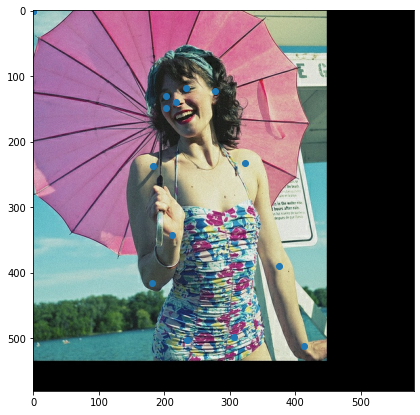

keypoints/vis: [2 2 2 2 0 2 2 2 2 2 2 2 0 2 0 2 0]
keypoints/x: [60.415 62.415 59.415 68.415  0.    68.415 56.415 66.415 40.415 48.415
 39.415 48.415  0.    36.415  0.    26.415  0.   ]
keypoints/y: [24.7 23.7 22.7 25.7  0.  33.7 32.7 42.7 39.7 29.7 30.7 56.7  0.  50.7
  0.  70.7  0. ]
ann_id: 198565
height: 91
image_id: 49
image_path: b'dataset/images/train2017/000000000049.jpg'
keypoints/num: 13
width: 91
Image shape: (91, 91, 3)


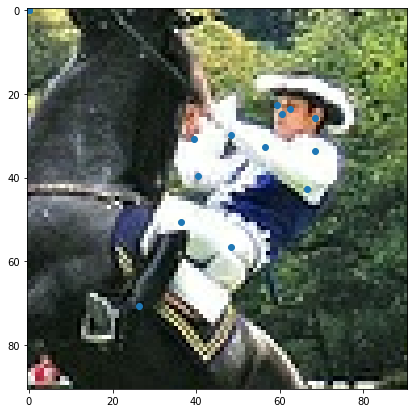

keypoints/vis: [1 2 1 2 0 2 2 2 0 0 0 2 2 2 0 2 0]
keypoints/x: [50.44625 52.44625 49.44625 59.44625  0.      58.44625 51.44625 43.44625
  0.       0.       0.      50.44625 44.44625 34.44625  0.      24.44625
  0.     ]
keypoints/y: [16.54625 15.54625 15.54625 16.54625  0.      25.54625 23.54625 33.54625
  0.       0.       0.      50.54625 48.54625 42.54625  0.      65.54625
  0.     ]
ann_id: 254537
height: 78
image_id: 49
image_path: b'dataset/images/train2017/000000000049.jpg'
keypoints/num: 11
width: 78
Image shape: (78, 78, 3)


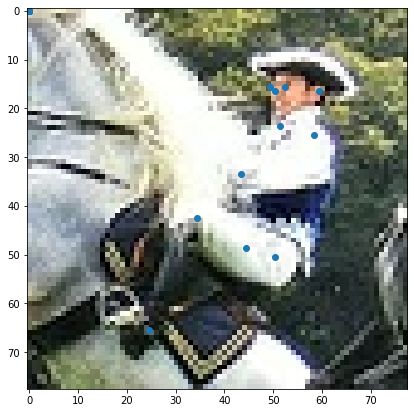

keypoints/vis: [0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
keypoints/x: [  0.        0.        0.       63.56625  73.56625  47.56625  69.56625
  37.56625  90.56625  29.56625 111.56625  37.56625  55.56625  37.56625
  74.56625  36.56625  60.56625]
keypoints/y: [  0.        0.        0.       31.55625  38.55625  42.55625  44.55625
  28.55625  37.55625  20.55625  27.55625  84.55625  86.55625  96.55625
  67.55625 128.55624  99.55625]
ann_id: 471474
height: 148
image_id: 77
image_path: b'dataset/images/train2017/000000000077.jpg'
keypoints/num: 14
width: 148
Image shape: (148, 148, 3)


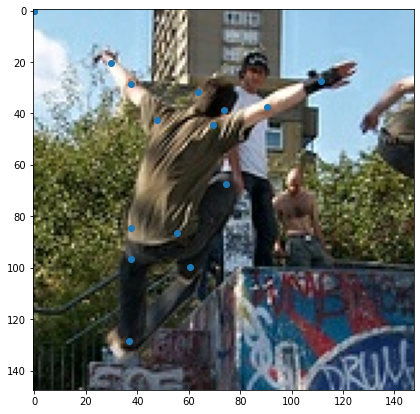

keypoints/vis: [0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2]
keypoints/x: [ 0.     0.    73.755  0.    69.755 47.755 57.755 29.755 82.755 18.755
 95.755 22.755 32.755 46.755 60.755 53.755 49.755]
keypoints/y: [ 0.    0.   27.43  0.   25.43 24.43 25.43 29.43 34.43 40.43 35.43 50.43
 52.43 72.43 68.43 95.43 98.43]
ann_id: 502475
height: 121
image_id: 77
image_path: b'dataset/images/train2017/000000000077.jpg'
keypoints/num: 14
width: 121
Image shape: (121, 121, 3)


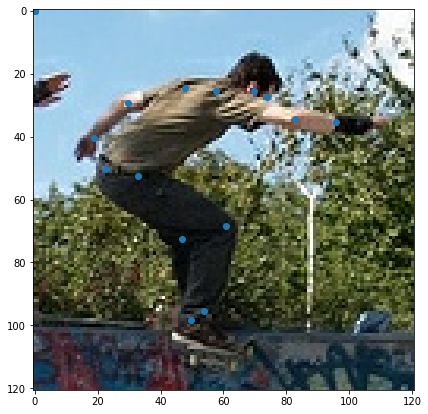

keypoints/vis: [0 0 0 0 2 2 2 2 0 2 0 2 2 2 2 2 2]
keypoints/x: [  0.        0.        0.        0.      120.05125 102.05125 129.05125
  92.05125   0.       76.05125   0.      116.05125 141.05125  81.05125
 111.05125  95.05125 115.05125]
keypoints/y: [  0.        0.        0.        0.       40.14625  59.14625  56.14625
  96.14625   0.      123.14625   0.      117.14625 116.14625 133.14626
 136.14626 174.14626 164.14626]
ann_id: 1727807
height: 206
image_id: 77
image_path: b'dataset/images/train2017/000000000077.jpg'
keypoints/num: 11
width: 206
Image shape: (206, 206, 3)


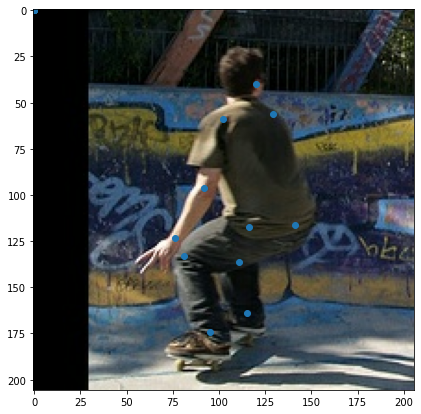

keypoints/vis: [2 2 2 0 2 2 2 2 2 2 2 2 2 1 2 1 2]
keypoints/x: [251.29625 255.29625 241.29625   0.      226.29625 273.29626 204.29625
 282.29626 177.29625 266.29626 216.29625 265.29626 230.29625 303.29626
 236.29625 265.29626 222.29625]
keypoints/y: [ 62.89625  54.89625  54.89625   0.       49.89625  88.89625  90.89625
 145.89626 154.89626 149.89626 149.89626 207.89626 207.89626 264.89624
 265.89624 348.89624 372.89624]
ann_id: 185913
height: 469
image_id: 86
image_path: b'dataset/images/train2017/000000000086.jpg'
keypoints/num: 16
width: 469
Image shape: (469, 469, 3)


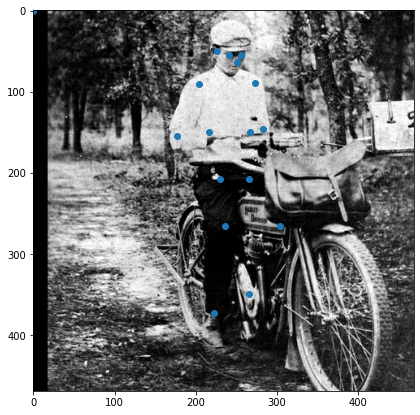

keypoints/vis: [2 2 2 2 0 2 2 0 2 2 2 1 1 0 0 0 0]
keypoints/x: [331.54126 383.54126 321.54126 462.54126   0.      494.54126 227.54124
   0.      107.54125 363.54126 142.54124 403.54126 203.54124   0.
   0.        0.        0.     ]
keypoints/y: [150.32625 120.32625 103.32625 116.32625   0.      241.32625 185.32625
   0.      264.32626 430.32626 299.32626 520.32623 482.32626   0.
   0.        0.        0.     ]
ann_id: 1210262
height: 593
image_id: 110
image_path: b'dataset/images/train2017/000000000110.jpg'
keypoints/num: 11
width: 593
Image shape: (593, 593, 3)


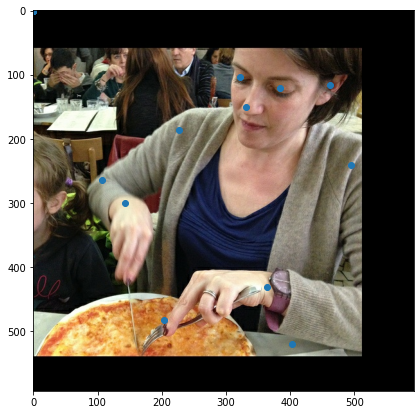

keypoints/vis: [2 2 2 2 0 2 2 1 1 0 0 0 0 0 0 0 0]
keypoints/x: [116.21625 140.21625 103.21625 209.21625   0.      242.21625  80.21625
 283.21625  59.21625   0.        0.        0.        0.        0.
   0.        0.        0.     ]
keypoints/y: [157.83125 137.83125 131.83125 145.83125   0.      210.83125 211.83125
 306.83124 318.83124   0.        0.        0.        0.        0.
   0.        0.        0.     ]
ann_id: 1220393
height: 351
image_id: 110
image_path: b'dataset/images/train2017/000000000110.jpg'
keypoints/num: 8
width: 351
Image shape: (351, 351, 3)


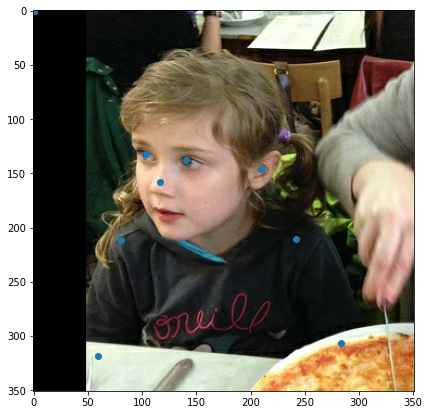

keypoints/vis: [0 0 0 0 0 2 2 1 1 0 0 1 1 0 0 0 0]
keypoints/x: [  0.        0.        0.        0.        0.       53.34875 133.34875
  38.34875 153.34875   0.        0.       70.34875 126.34875   0.
   0.        0.        0.     ]
keypoints/y: [  0.        0.        0.        0.        0.       86.04375  68.04375
 154.04375 124.04375   0.        0.      208.04375 206.04375   0.
   0.        0.        0.     ]
ann_id: 1279416
height: 171
image_id: 110
image_path: b'dataset/images/train2017/000000000110.jpg'
keypoints/num: 6
width: 171
Image shape: (171, 171, 3)


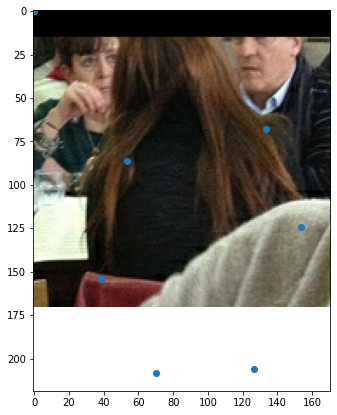

keypoints/vis: [1 1 2 0 2 0 2 0 2 0 2 0 0 0 0 0 0]
keypoints/x: [95.975 98.975 84.975  0.    73.975  0.    63.975  0.    36.975  0.
 66.975  0.     0.     0.     0.     0.     0.   ]
keypoints/y: [31.79 24.79 26.79  0.   33.79  0.   55.79  0.   96.79  0.   63.79  0.
  0.    0.    0.    0.    0.  ]
ann_id: 1282543
height: 117
image_id: 110
image_path: b'dataset/images/train2017/000000000110.jpg'
keypoints/num: 7
width: 117
Image shape: (117, 117, 3)


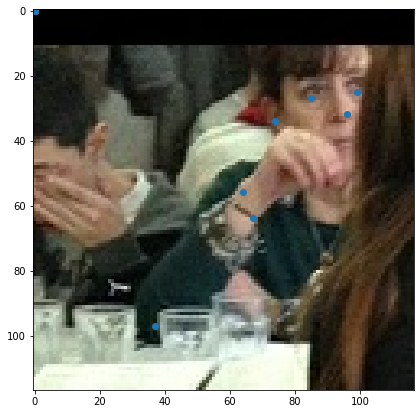

keypoints/vis: [2 2 2 2 0 2 2 1 1 2 2 0 0 0 0 0 0]
keypoints/x: [40.9925 46.9925 34.9925 61.9925  0.     86.9925 36.9925 83.9925 23.9925
 66.9925 24.9925  0.      0.      0.      0.      0.      0.    ]
keypoints/y: [ 55.5475  48.5475  49.5475  39.5475   0.      61.5475  67.5475 108.5475
 105.5475  69.5475  69.5475   0.       0.       0.       0.       0.
   0.    ]
ann_id: 1287271
height: 107
image_id: 110
image_path: b'dataset/images/train2017/000000000110.jpg'
keypoints/num: 10
width: 107
Image shape: (107, 107, 3)


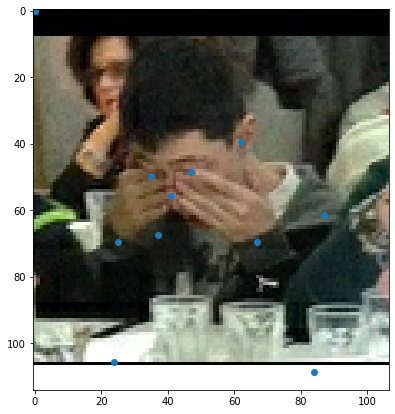

keypoints/vis: [2 0 2 0 2 2 2 0 1 0 2 0 0 0 0 0 0]
keypoints/x: [153.87875   0.      147.87875   0.      132.87875  46.87875 115.87875
   0.      150.87875   0.      157.87875   0.        0.        0.
   0.        0.        0.     ]
keypoints/y: [ 67.80375   0.       64.80375   0.       71.80375  97.80375 110.80375
   0.      171.80376   0.      112.80375   0.        0.        0.
   0.        0.        0.     ]
ann_id: 1299043
height: 218
image_id: 110
image_path: b'dataset/images/train2017/000000000110.jpg'
keypoints/num: 7
width: 218
Image shape: (218, 218, 3)


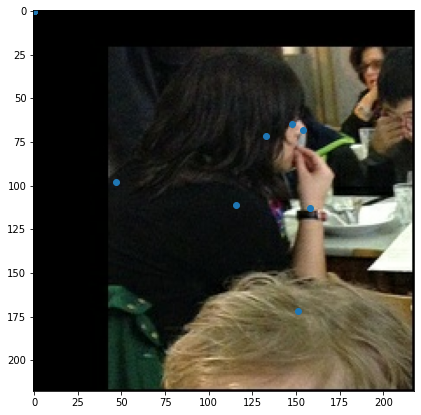

keypoints/vis: [0 0 0 2 2 1 1 0 0 0 0 1 1 0 0 0 0]
keypoints/x: [ 0.       0.       0.      45.43875 66.43875 31.43875 71.43875  0.
  0.       0.       0.      34.43875 64.43875  0.       0.       0.
  0.     ]
keypoints/y: [  0.        0.        0.       25.29375  25.29375  43.29375  48.29375
   0.        0.        0.        0.      108.29375 109.29375   0.
   0.        0.        0.     ]
ann_id: 1310041
height: 105
image_id: 110
image_path: b'dataset/images/train2017/000000000110.jpg'
keypoints/num: 6
width: 105
Image shape: (105, 105, 3)


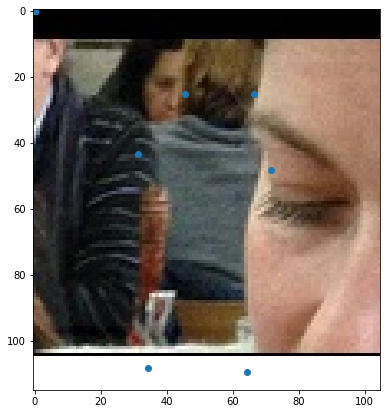

keypoints/vis: [2 2 2 2 0 2 1 2 0 1 0 1 1 0 0 0 0]
keypoints/x: [31.92375 38.92375 25.92375 59.92375  0.      78.92375 19.92375 74.92375
  0.      26.92375  0.      66.92375 22.92375  0.       0.       0.
  0.     ]
keypoints/y: [ 20.67875  12.67875  12.67875  14.67875   0.       39.67875  47.67875
  97.67875   0.       98.67875   0.      143.67876 147.67876   0.
   0.        0.        0.     ]
ann_id: 1731435
height: 116
image_id: 110
image_path: b'dataset/images/train2017/000000000110.jpg'
keypoints/num: 10
width: 116
Image shape: (116, 116, 3)


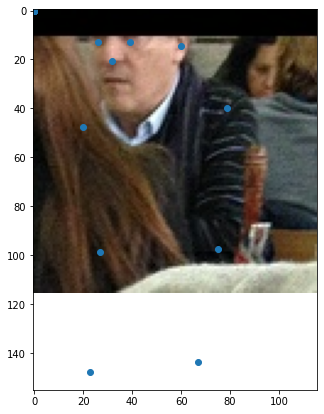

keypoints/vis: [2 2 2 0 2 2 2 1 2 1 2 2 2 1 1 1 1]
keypoints/x: [319.245 331.245 305.245   0.    281.245 338.245 251.245 388.245 223.245
 441.245 252.245 341.245 278.245 329.245 269.245 343.245 267.245]
keypoints/y: [135.465 122.465 124.465   0.    121.465 177.465 188.465 283.465 285.465
 316.465 379.465 352.465 364.465 482.465 492.465 598.465 608.465]
ann_id: 505536
height: 568
image_id: 113
image_path: b'dataset/images/train2017/000000000113.jpg'
keypoints/num: 16
width: 568
Image shape: (568, 568, 3)


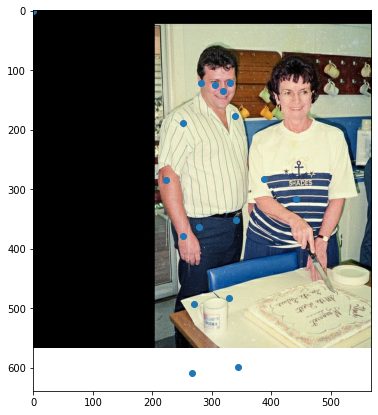

keypoints/vis: [0 0 0 0 0 0 2 0 2 0 0 0 2 2 2 1 1]
keypoints/x: [  0.        0.        0.        0.        0.        0.      225.46124
   0.      234.46124   0.        0.        0.      210.46124 234.46124
 200.46124 223.46124 174.46124]
keypoints/y: [  0.        0.        0.        0.        0.        0.       70.54125
   0.      151.54124   0.        0.        0.      175.54124 295.54126
 303.54126 387.54126 388.54126]
ann_id: 1207747
height: 410
image_id: 113
image_path: b'dataset/images/train2017/000000000113.jpg'
keypoints/num: 7
width: 410
Image shape: (410, 410, 3)


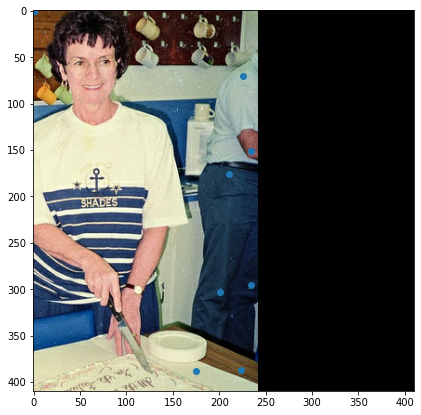

keypoints/vis: [2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 0 0]
keypoints/x: [231.87 244.87 218.87 257.87 201.87 288.87 177.87 301.87 173.87 278.87
 222.87 272.87 184.87 258.87 198.87   0.     0.  ]
keypoints/y: [130.78 117.78 118.78 122.78 126.78 197.78 199.78 287.78 295.78 362.78
 327.78 376.78 379.78 522.78 524.78   0.     0.  ]
ann_id: 1723247
height: 483
image_id: 113
image_path: b'dataset/images/train2017/000000000113.jpg'
keypoints/num: 15
width: 483
Image shape: (483, 483, 3)


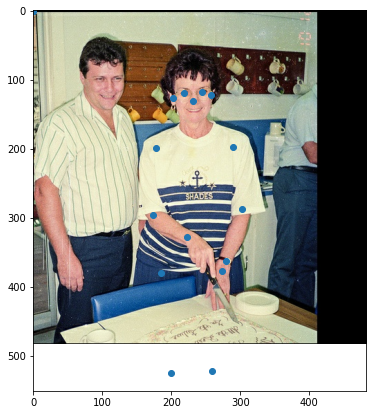

keypoints/vis: [2 0 2 0 2 0 2 0 0 0 0 0 0 0 0 0 0]
keypoints/x: [171.4525   0.     170.4525   0.     143.4525   0.     137.4525   0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.    ]
keypoints/y: [ 98.5025   0.      83.5025   0.      88.5025   0.     163.5025   0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.    ]
ann_id: 500146
height: 322
image_id: 136
image_path: b'dataset/images/train2017/000000000136.jpg'
keypoints/num: 4
width: 322
Image shape: (322, 322, 3)


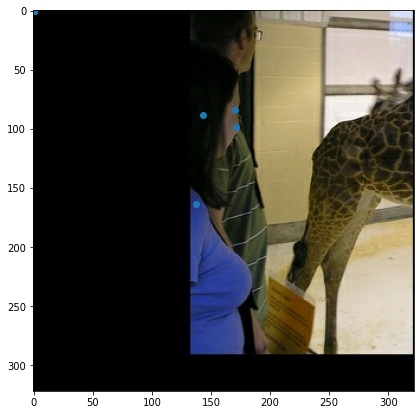

keypoints/vis: [0 0 2 0 2 0 1 0 1 0 1 0 1 0 0 0 0]
keypoints/x: [  0.        0.      212.94624   0.      204.94624   0.      182.94624
   0.      174.94624   0.      203.94624   0.      192.94624   0.
   0.        0.        0.     ]
keypoints/y: [  0.        0.       80.73125   0.       79.73125   0.      153.73125
   0.      242.73125   0.      317.73126   0.      317.73126   0.
   0.        0.        0.     ]
ann_id: 502933
height: 390
image_id: 136
image_path: b'dataset/images/train2017/000000000136.jpg'
keypoints/num: 6
width: 390
Image shape: (390, 390, 3)


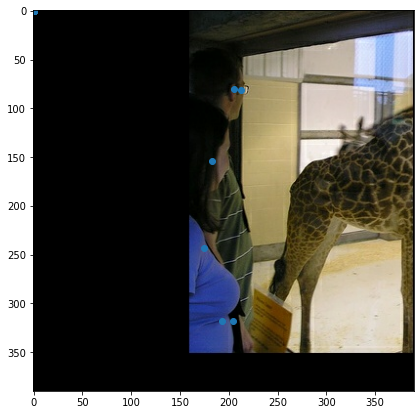

In [ ]:
gen_examples_from_tfrecord('dataset/tfrecords/train/file_train_00-2048.tfrec', 20)

In [1]:
import sys
sys.path.append('./drive/MyDrive/single-person-pose-estimation')

In [2]:
import tensorflow as tf
import numpy as np
import cv2
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables import Keypoint, KeypointsOnImage
import matplotlib.pyplot as plt

In [3]:
from configs import default_config as cfg
from dataset_builder import DatasetBuilder

In [ ]:
def np_gen_heatmaps(keypoints: np.array, cfg):
  '''
  Creates 2D heatmaps from keypoints coordinates for one single example/image
  :param: keypoints array of shape (number of kpts, 3 ), 3: x, y, vis ,keypoints coodirnates have to be bound inside heatmap shape
  :output: array of heatmaps (heatmap_width, heatmap_height, number of kpts)
  '''
  assert len(keypoints) == cfg.NUM_KEYPOINTS
  heatmaps = np.zeros((cfg.LABEL_HEIGHT, cfg.LABEL_WIDTH, cfg.NUM_KEYPOINTS), dtype = np.float32)
  for i in range(cfg.NUM_KEYPOINTS):
    x = int(keypoints[i, 0])
    y = int(keypoints[i, 1])
    if 0 < x < cfg.LABEL_WIDTH and 0 < y < cfg.LABEL_HEIGHT:
      heatmaps[y][x][i] = 1.0
      heatmaps[:,:,i] = cv2.GaussianBlur(heatmaps[:,:,i],(cfg.GAUSSIAN_KERNEL, cfg.GAUSSIAN_KERNEL), 0)#blur
      heatmaps[:,:,i] = heatmaps[:,:,i] / heatmaps[:,:,i].max()#normalize
  return heatmaps


In [ ]:
kpts = np.array([[12, 5],
        [45, 50],
        [63, 63]])
hm = np_gen_heatmaps(kpts, cfg)

In [ ]:
test = [tuple(kp) for kp in kpts] 
test

[(12, 5), (45, 50), (63, 63)]

In [ ]:
hm

array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

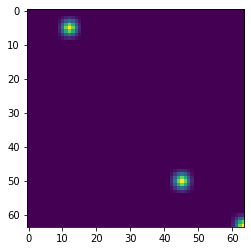

In [ ]:
plt.imshow(np.sum(hm, axis = -1))

In [ ]:
def np_augment(image, keypoints):
  '''
  Augment the image and keypoints
  Only augment the valid keypoints (not (0, 0))
  :keypoints in shape (num keypoints, 2)
  '''

  imgaug_kpts = [] # to store imgaug keypoint format
  idxs = []
  for i, kpt in enumerate(keypoints):
    if 0 < kpt[0] < image.shape[1] and 0 < kpt[1] < image.shape[0]:
      imgaug_kpts.append(Keypoint(x = kpt[0], y = kpt[1]))
      idxs.append(i)
  kptsoi = KeypointsOnImage(imgaug_kpts, shape = image.shape)

  #augment
  seed = np.random.randint(2**32-1)
  ia.seed(1)
  seq = iaa.Sequential([
    iaa.Affine(scale = (0.75, 1.25), rotate = (-30, 30)),
    iaa.Fliplr(0.5),
    ], random_order = False) #cause rotate/scale then flip can be problematic
  aug_img, aug_kps = seq(image = image, keypoints = kptsoi)

  arr = aug_kps.to_xy_array()
  output_kpts = np.zeros(shape = (17, 2), dtype = np.float32)


  for i, xy in zip(idxs, arr):
    output_kpts[i] = xy
  
  return aug_img, output_kpts
  



In [ ]:
ds = tf.data.TFRecordDataset('dataset/tfrecords/valid/file_valid_00-2048.tfrec')
ds = ds.map(parse_tfrecord_fn)

for features in ds.take(30):
  xcoords = features['keypoints/x'].numpy()
  ycoords = features['keypoints/y'].numpy()
  width = features['width'].numpy()
  height = features['height'].numpy()
  img = features['image'].numpy()
  #xcoords = xcoords * (64/width)
  #ycoords = ycoords * (64/height)
  kpts = [np.array([x, y]) for x, y in zip(xcoords, ycoords)]

  aug_img, aug_kpts = np_augment(img, kpts)
  hm = np_gen_heatmaps(np.array(kpts), cfg)


  plt.figure(figsize = (7, 7))
 
  #plt.imshow(tf.image.resize(aug_img, (256, 256)))
  plt.scatter(aug_kpts[:, 0], aug_kpts[:, 1])
  plt.imshow(aug_img)
  #hm = tf.image.resize(hm, (256, 256))
  #plt.imshow(tf.reduce_sum(hm, axis = -1), alpha = 0.5)


Output hidden; open in https://colab.research.google.com to view.

In [17]:
ds_builder = DatasetBuilder(cfg)
ds_train, ds_valid = ds_builder.build_ds()

In [40]:
train_filenames = tf.io.gfile.glob(f"/content/dataset/tfrecords/train/*.tfrec")
train_filenames.sort()
train_filenames[0]

'/content/dataset/tfrecords/train/file_train_00-2048.tfrec'

In [41]:
train_filenames[0].split('-')

['/content/dataset/tfrecords/train/file_train_00', '2048.tfrec']

In [45]:
def get_ds_length(file_names):
  length = 0
  for name in file_names:
    temp = name.split('-')[-1]
    temp = temp.split('.')[0]
    length += int(temp)
  return length

In [46]:
print(get_ds_length(train_filenames))

149813


In [ ]:
SIZE = 256
HMAP_SIZE = 64
BATCH_SIZE = 16
GAUSSIAN_KERNEL = 7 # adjust to size of pic EX: 128 => 51 ratio of 0.4


TRAIN_EXAMPLES = 149813
VALID_EXAMPLES = 6352
STEPS_PER_EPOCH = TRAIN_EXAMPLES // BATCH_SIZE + 1
VALIDATION_STEPS = VALID_EXAMPLES // BATCH_SIZE + 1
NUM_EPOCHS = 1000

filters_const = 256
number_keypoints = 17

In [ ]:
def np_augment(img, xcoords, ycoords):

  #lsit of tuples [(x1, y1), ...]
  kps = [] 
  idx = [] #to store index of valid kps
  for i in range(len(xcoords)):
    x = xcoords[i]
    y = ycoords[i]
    if 0 < x < img.shape[1] and 0 < y < img.shape[0]:
      kps.append(Keypoint(x = x, y = y))
      idx.append(i)

  kpsoi = KeypointsOnImage(kps, shape = img.shape)

  #augment
  seed = np.random.randint(2**32-1)
  ia.seed(seed)
  seq = iaa.Sequential([
    iaa.Affine(scale = (0.75, 1.25), rotate = (-30, 30)),
    iaa.Fliplr(0.5),
    ], random_order = False) #cause rotate/scale then flip can be problematic
  aug_img, aug_kps = seq(image = img, keypoints = kpsoi)

  #turn aug_kps back to x, y lists
  arr = aug_kps.to_xy_array()
  
  temp_xcoords = arr[:, 0]
  temp_ycoords = arr[:, 1]
  aug_xcoords = np.zeros(shape = (number_keypoints), dtype = np.float32)
  aug_ycoords = np.zeros(shape = (number_keypoints), dtype = np.float32)

  for i, x, y in zip(idx, temp_xcoords, temp_ycoords):
    aug_xcoords[i] = x
    aug_ycoords[i] = y;
  return aug_img, aug_xcoords, aug_ycoords
def tf_augment(img, xcoords, ycoords):
  return tf.numpy_function(np_augment, [img, xcoords, ycoords], (tf.float32, tf.float32, tf.float32))

In [ ]:
def np_heatmap(x, y):
  width = HMAP_SIZE 
  height = HMAP_SIZE
  assert len(x) == len(y) and len(x)== number_keypoints
  depth = len(x)
  #generate heat map
  h_map = np.zeros((width, height, depth))
  for i in range(depth):
    x_index = round(x[i]) #width
    y_index = round(y[i]) #height
    if (0 < x_index < width) and (0 < y_index < height): 
      h_map[y_index][x_index][i] = 1.0 #entry at keypoint = 1
      h_map[:,:,i] = cv2.GaussianBlur(h_map[:,:,i],(GAUSSIAN_KERNEL, GAUSSIAN_KERNEL), 0)#blur
      h_map[:,:,i] = h_map[:,:,i] / h_map[:,:,i].max()#normalize
  return h_map.astype(np.float32)
def tf_heatmap(input1 , input2):
  return tf.numpy_function(np_heatmap, [input1, input2], tf.float32)

In [ ]:
def prepare_sample(example):
  ## Getting all the necessary data
  img = example['image']
  img_shape = img.get_shape()
  height = example['height']
  width = example['width']
  xcoords = example['keypoints/x'] 
  ycoords = example['keypoints/y']

  # img, x, y should be in image's dimensions
  aug_img, aug_xcoords, aug_ycoords = tf_augment(img, xcoords, ycoords)
  aug_img.set_shape(img_shape)
  #recal x,y into heatmaps space
  h_ratio = HMAP_SIZE / height
  w_ratio = HMAP_SIZE / width 
  aug_xcoords = aug_xcoords * tf.cast(w_ratio, tf.float32)
  aug_ycoords = aug_ycoords * tf.cast(h_ratio, tf.float32)

  #heatmap
  heatmap = tf_heatmap(aug_xcoords, aug_ycoords)

  #img to (256, 256)
  aug_img = tf.image.resize(aug_img, (SIZE, SIZE))

  return  aug_img, heatmap



---


---


Test the module

Train dataset with 149813 examples.
Valid dataset with 6352 examples.
FULL


In [4]:
ds_builder = DatasetBuilder(cfg, 0.5)
ds_train, ds_valid = ds_builder.build_datasets()

Train dataset with 75776 examples.
Valid dataset with 4096 examples.


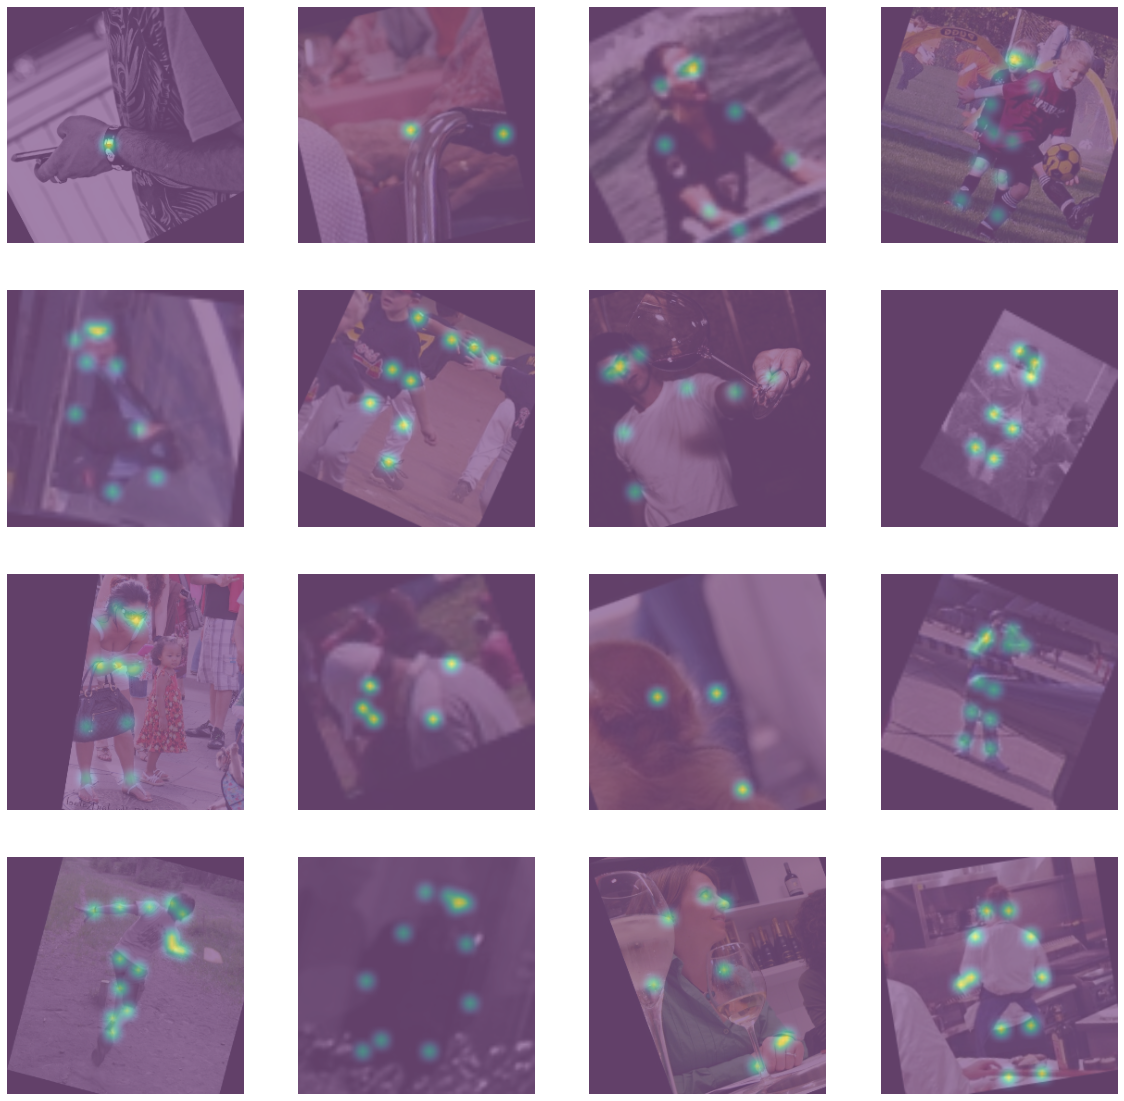

In [6]:
#ground truth
it = iter(ds_train)
images_batch, heatmaps_batch = next(it)
plt.figure(figsize=(20,20))
for i in range(16):
    ax = plt.subplot(16/4, 16/4, i + 1)
    plt.imshow(images_batch[i], cmap = 'gray', alpha = 0.5)
    h = tf.image.resize(heatmaps_batch[i], (256, 256))
    plt.imshow(tf.reduce_sum(h, axis = -1), alpha = 0.5)
    plt.axis("off")

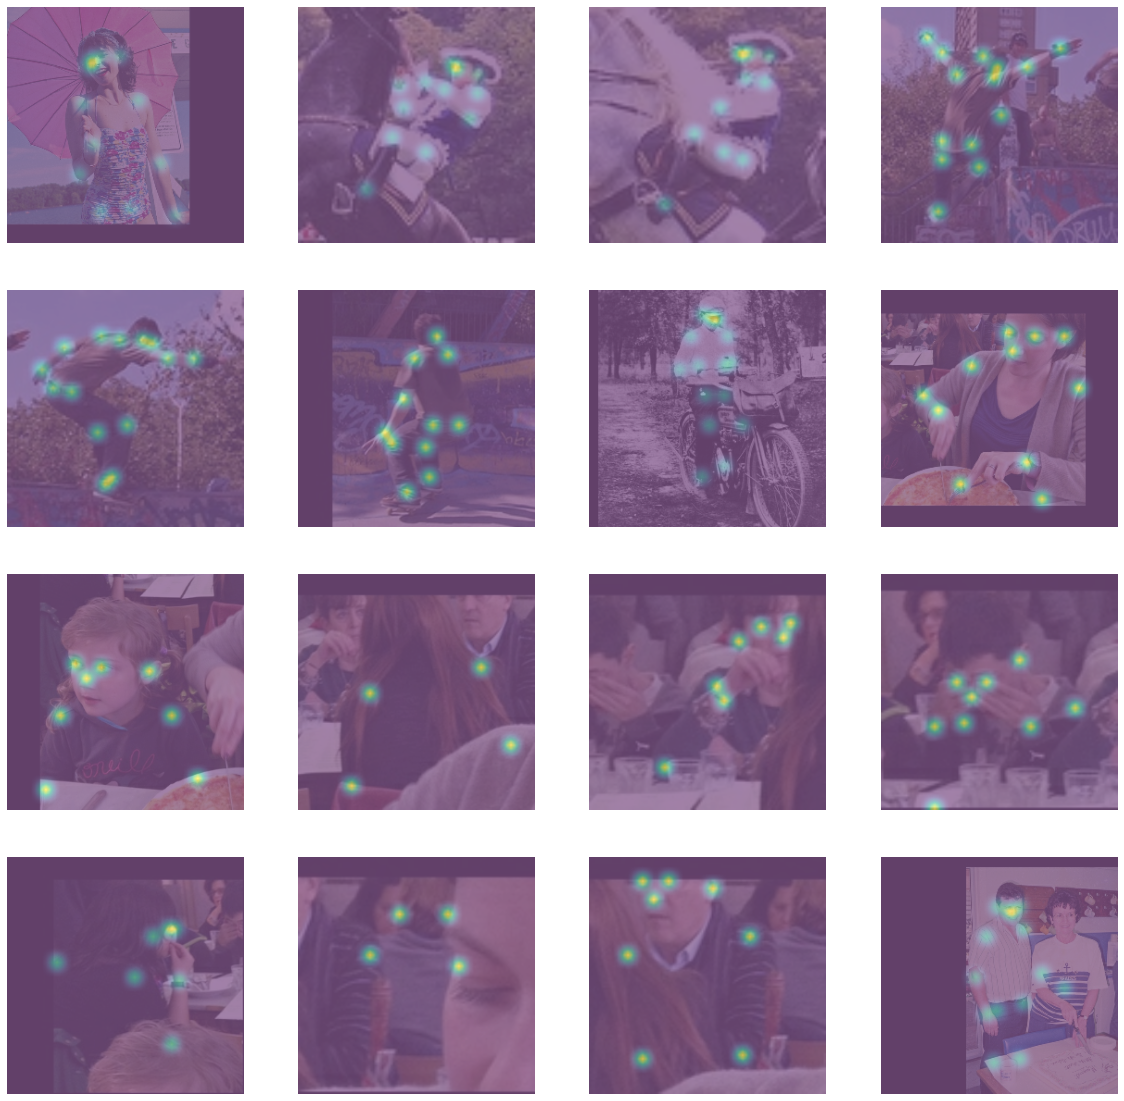

In [5]:
#ground truth
it = iter(ds_valid)
images_batch, heatmaps_batch = next(it)
plt.figure(figsize=(20,20))
for i in range(16):
    ax = plt.subplot(16/4, 16/4, i + 1)
    plt.imshow(images_batch[i], cmap = 'gray', alpha = 0.5)
    h = tf.image.resize(heatmaps_batch[i], (256, 256))
    plt.imshow(tf.reduce_sum(h, axis = -1), alpha = 0.5)
    plt.axis("off")
